<a href="https://colab.research.google.com/github/Elizabethav03/Scratchpad/blob/main/Class(1/22)_2026_01_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Elizabethav03/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 4), reused 0 (delta 0), pack-reused 24 (from 1)
Receiving objects: 100% (30/30), 30.23 KiB | 5.04 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Download complete
Extracting data files...
Data extracted


OK, let's see if this saves back the way I expect.

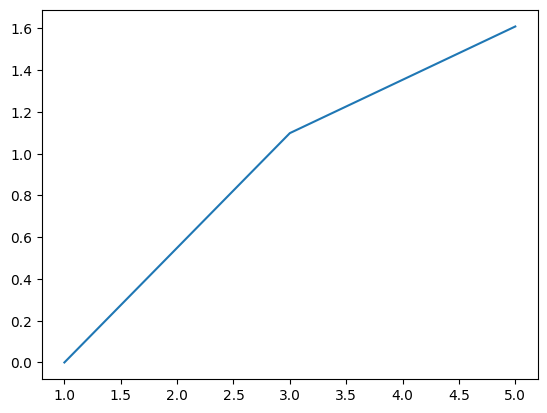

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,3,5])
y = np.log(x)

plt.plot(x,y)
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv('/content/data/zoo.csv', encoding= 'latin1')

In [4]:
df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.dtypes

,0
animal,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [6]:
df.shape

(101, 18)

In [7]:
df['legs'].describe()

,legs
count,101.000000
mean,2.841584
std,2.033385
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,8.000000


In [8]:
import os
import urllib.request
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()



In [18]:
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding= 'latin1')
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [19]:
df.dtypes

,0
response_datetime,object
problem,object
is_911_call,object
primary_offense,object
subject_injury,object
force_type,object
force_type_action,object
race,object
sex,object
age,float64


In [20]:
is_missing = df['race'].isna()
is_missing

,race
0,False
1,False
2,False
3,False
4,False
...,...
12920,False
12921,True
12922,False
12923,False


<Axes: ylabel='Count'>

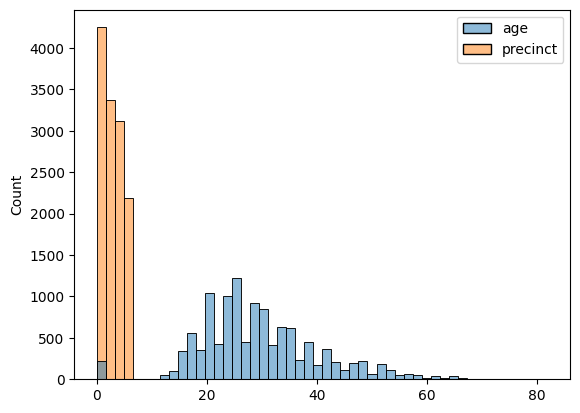

In [21]:
import seaborn as sns

sns.histplot(df)